<a href="https://colab.research.google.com/github/RoopamSeal/Diabetes-Prediction/blob/main/Diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data['Age_Squared'] = data['Age'] ** 2
data['BMI_Glucose'] = data['BMI'] * data['Glucose']
data['Age_Pregnancies'] = data['Age'] * data['Pregnancies']

# Check the new features
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Squared,BMI_Glucose,Age_Pregnancies
0,6,148,72,35,0,33.6,0.627,50,1,2500,4972.8,300
1,1,85,66,29,0,26.6,0.351,31,0,961,2261.0,31
2,8,183,64,0,0,23.3,0.672,32,1,1024,4263.9,256
3,1,89,66,23,94,28.1,0.167,21,0,441,2500.9,21
4,0,137,40,35,168,43.1,2.288,33,1,1089,5904.7,0


In [13]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Age_Squared               768 non-null    int64  
 10  BMI_Glucose               768 non-null    float64
 11  Age_Pregnancies           768 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 72.1 KB


In [14]:
missing = data.isnull().sum()
missing

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
Age_Squared,0


In [15]:
duplicates = data.duplicated().sum()
duplicates

np.int64(0)

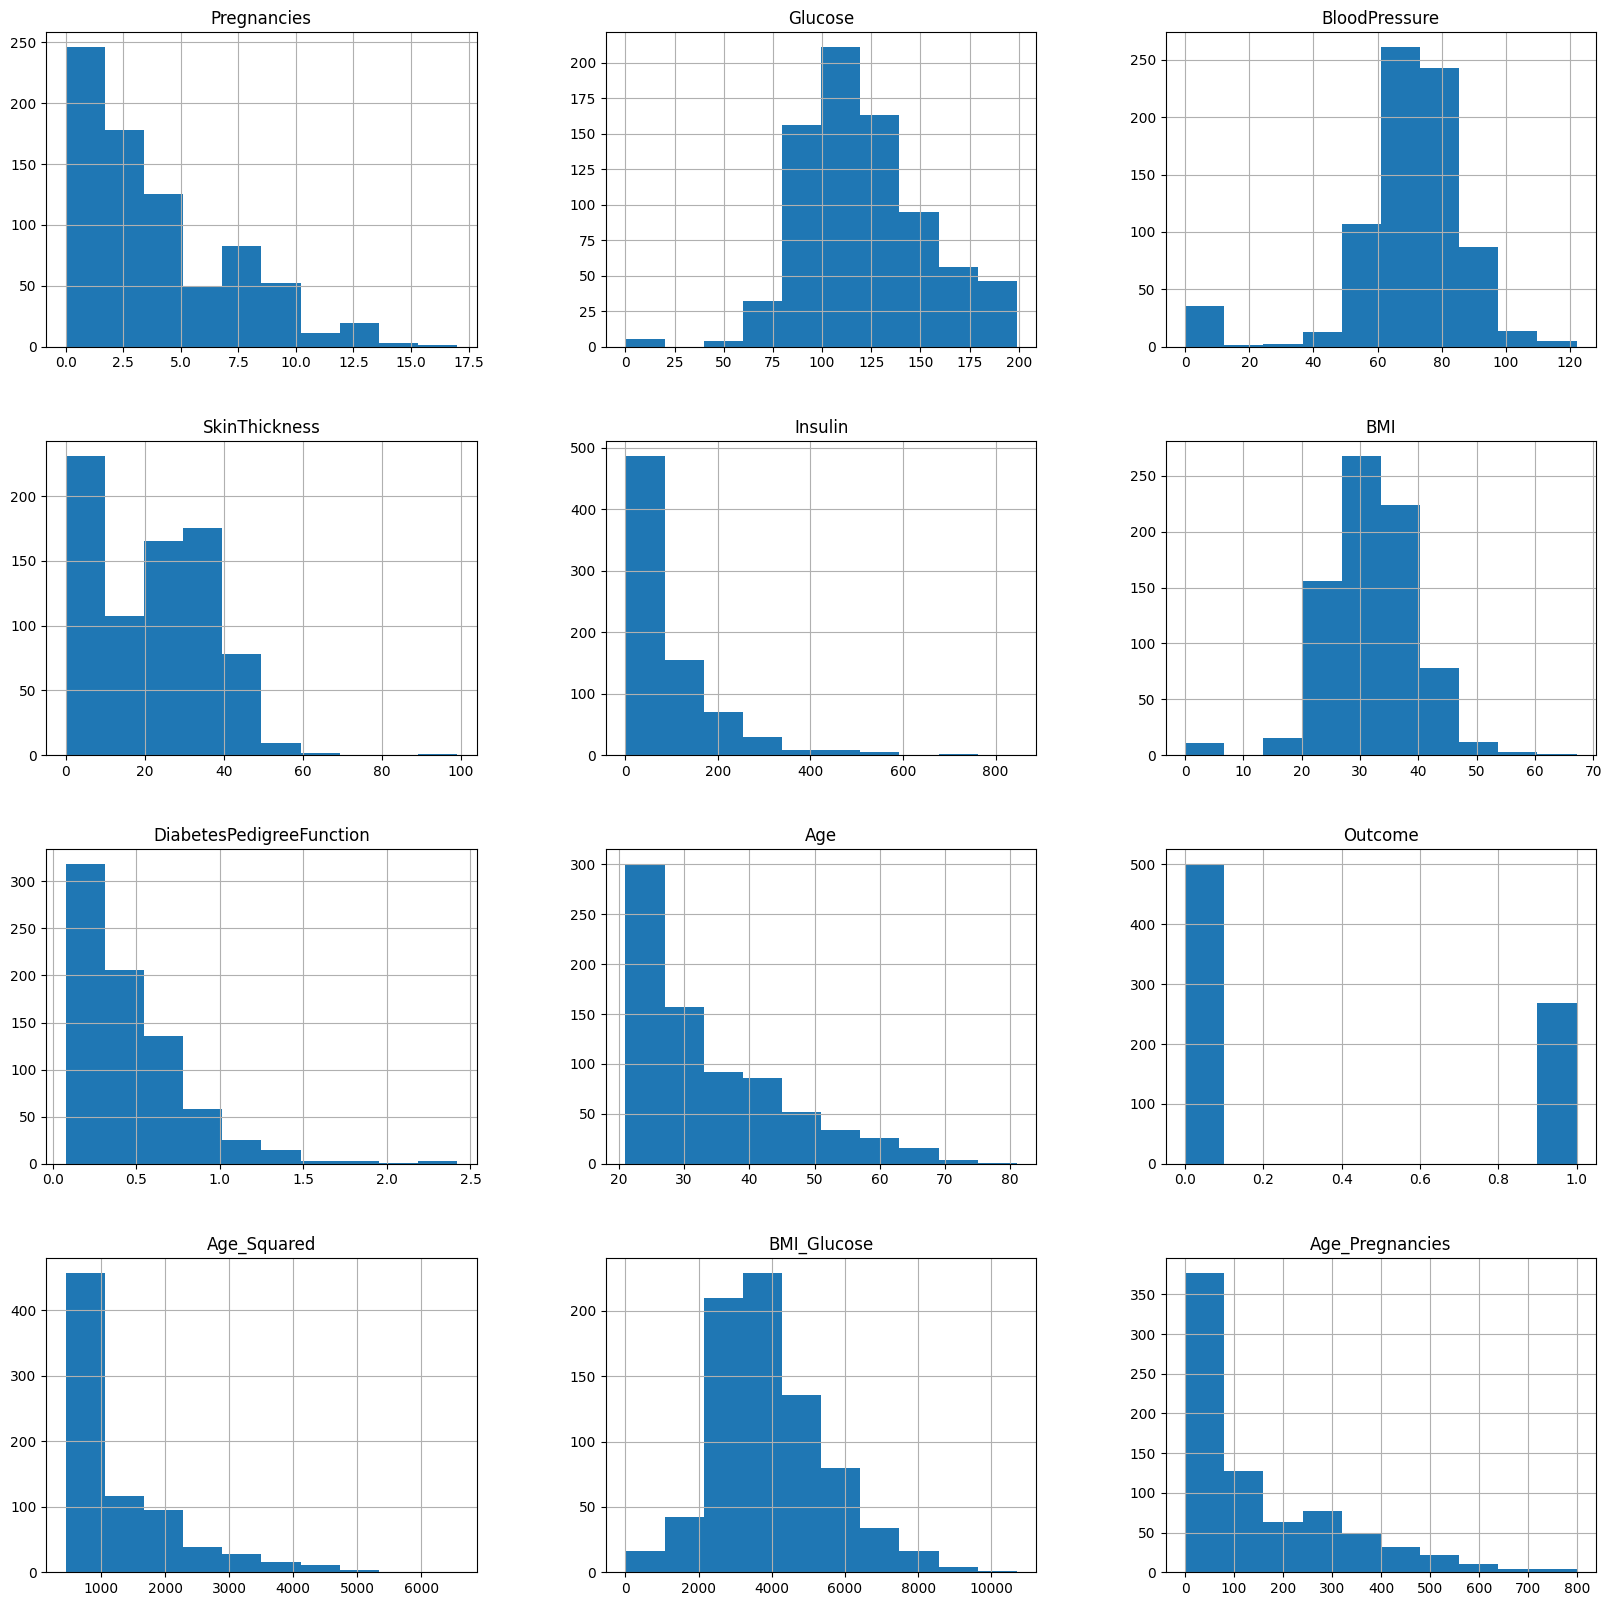

In [9]:
p = data.hist(figsize=(20, 20))

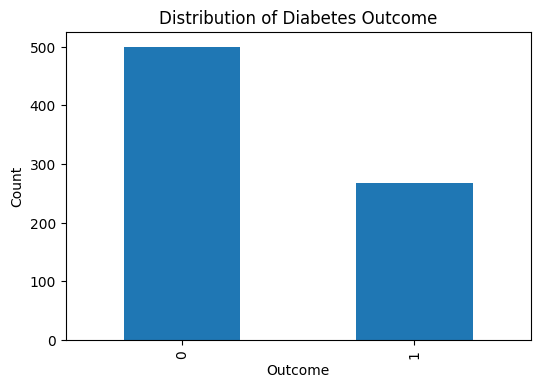

In [16]:
import matplotlib.pyplot as plt
data["Outcome"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcome")
plt.savefig("Distribution.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

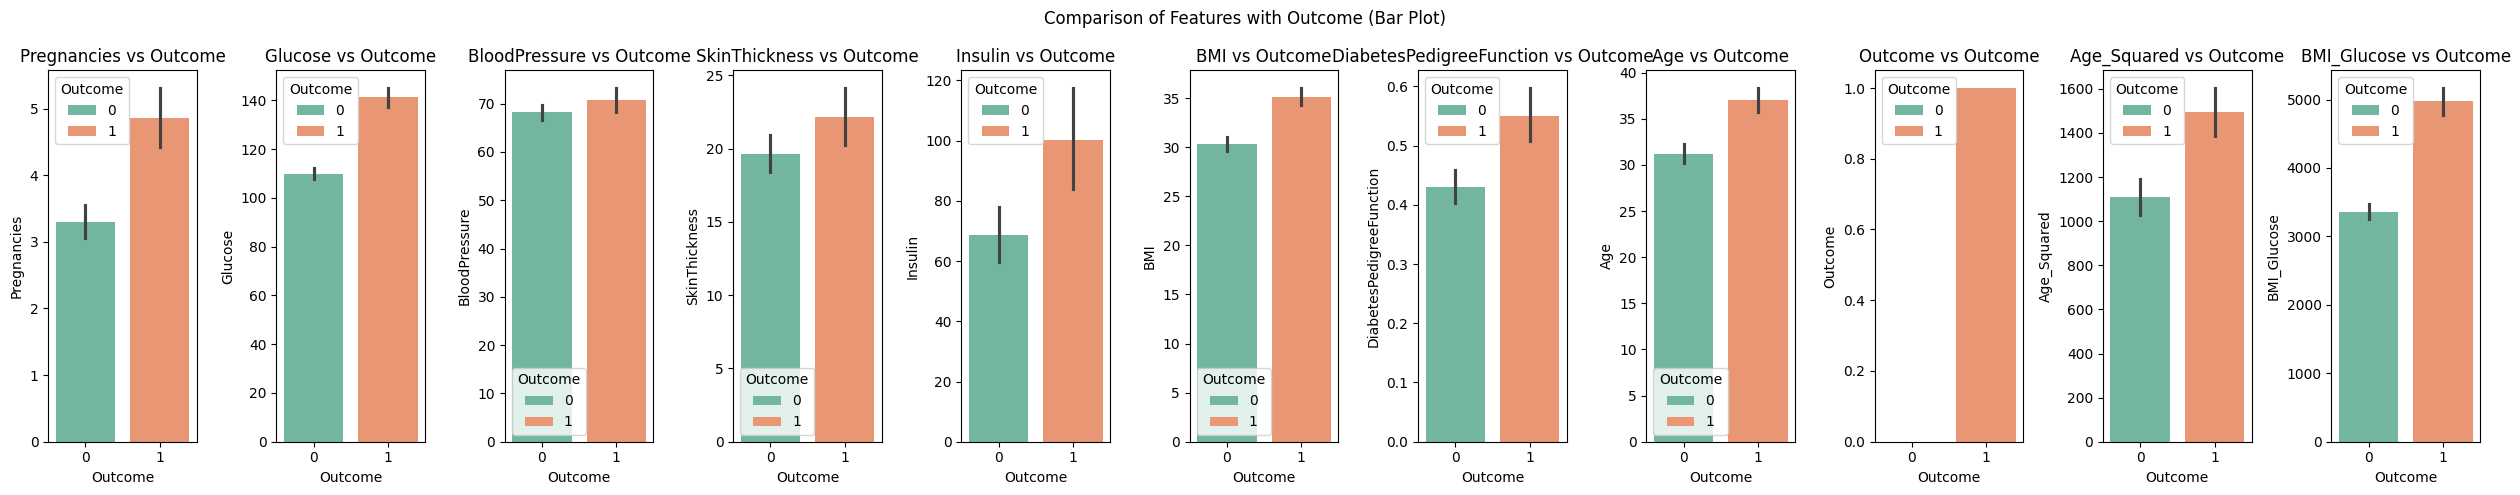

In [17]:
fig, axes = plt.subplots(1, 11, figsize=(25, 5))
for i, feature in enumerate(data.columns[:-1]):
    sns.barplot(x=data['Outcome'], y=data[feature], hue=data['Outcome'], ax=axes[i], palette="Set2")
    axes[i].set_title(f'{feature} vs Outcome')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel(feature)

plt.suptitle("Comparison of Features with Outcome (Bar Plot)")
plt.tight_layout()
plt.show()

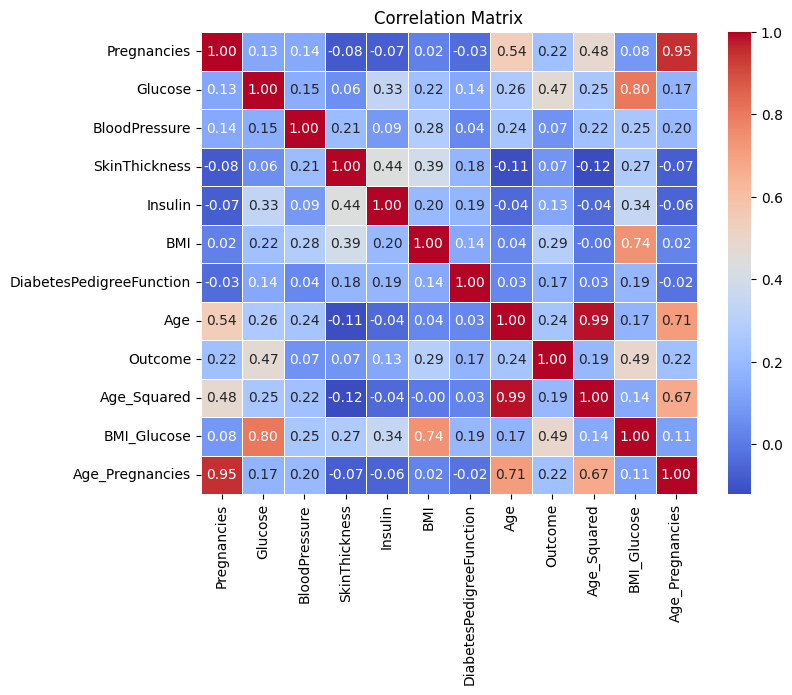

In [18]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.savefig("Correlation.jpeg", dpi=300, bbox_inches= "tight")
plt.show()

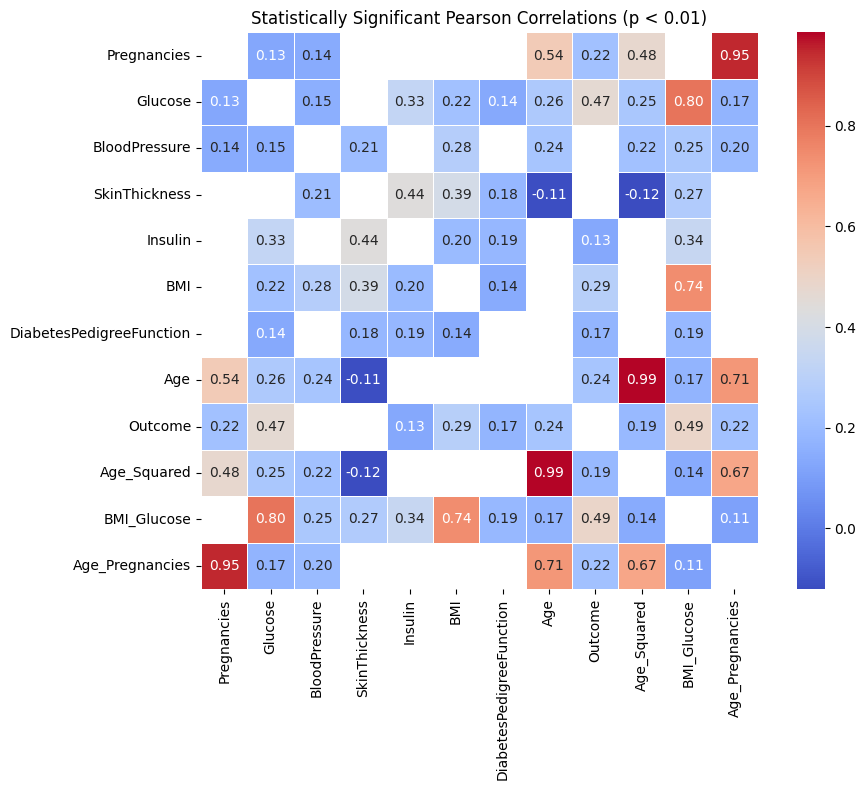

In [19]:
# use pearson coefficient correlation
from scipy.stats import pearsonr
# Initialize matrices
cols = data.columns
n = len(cols)
corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
pval_matrix = pd.DataFrame(np.ones((n, n)), columns=cols, index=cols)

# Compute correlation and p-values
for i in range(n):
    for j in range(n):
        if i != j:
            r, p = pearsonr(data[cols[i]], data[cols[j]])
            corr_matrix.iloc[i, j] = r
            pval_matrix.iloc[i, j] = p

# Keep only statistically significant correlations (e.g., p < 0.05)
significance_mask = pval_matrix < 0.01
significant_corrs = corr_matrix.where(significance_mask)

# Optional: set self-correlations to NaN for better visualization
np.fill_diagonal(significant_corrs.values, np.nan)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(significant_corrs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, mask=~significance_mask)
plt.title("Statistically Significant Pearson Correlations (p < 0.01)")
plt.tight_layout()
plt.show()

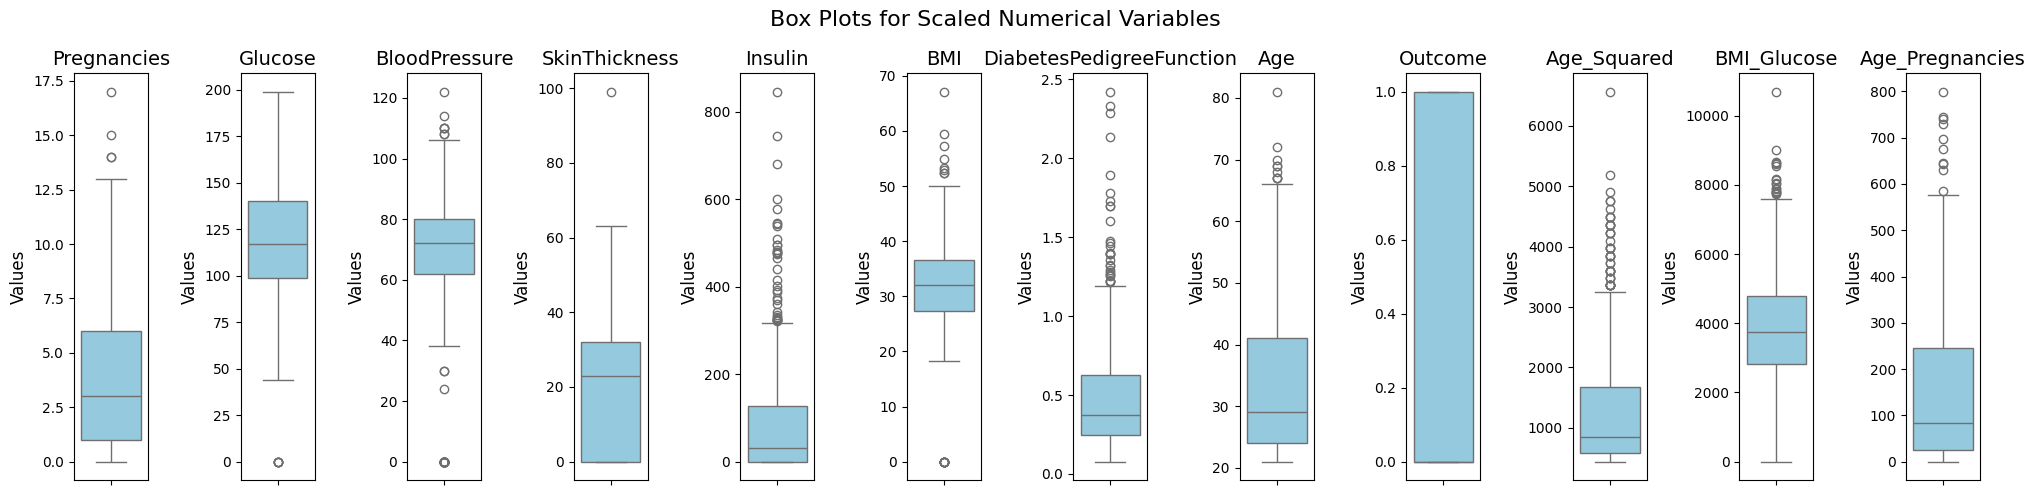

In [20]:
fig, axes = plt.subplots(1, 12, figsize=(20, 5))
for i, column in enumerate(data.columns):
    sns.boxplot(y=data[column], ax=axes[i], color="skyblue")
    axes[i].set_title(column, fontsize=14)
    axes[i].set_ylabel("Values", fontsize=12)

plt.suptitle("Box Plots for Scaled Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()

                     Feature  Mutual_Information
9                BMI_Glucose            0.130693
1                    Glucose            0.108559
5                        BMI            0.092592
4                    Insulin            0.065031
7                        Age            0.058849
8                Age_Squared            0.050070
10           Age_Pregnancies            0.046020
0                Pregnancies            0.032941
2              BloodPressure            0.029139
3              SkinThickness            0.010843
6   DiabetesPedigreeFunction            0.010722


<ipython-input-21-f4a911149a4f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df, x='Mutual_Information', y='Feature', palette='magma')


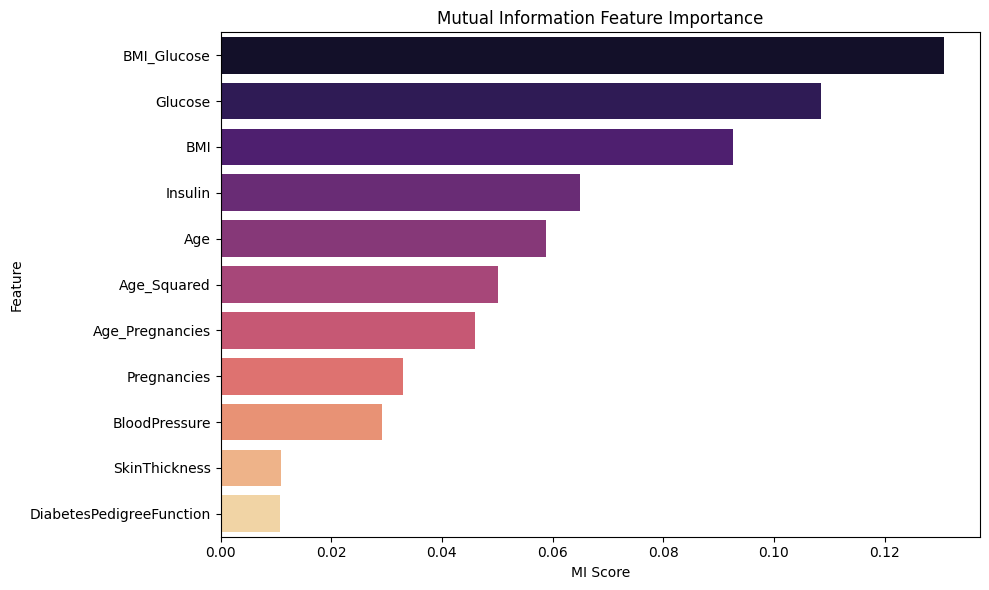

In [21]:
from sklearn.feature_selection import mutual_info_classif

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create DataFrame for display
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mi_scores
}).sort_values(by='Mutual_Information', ascending=False)

# Print the scores
print(mi_df)

# Plot the scores
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='Mutual_Information', y='Feature', palette='magma')
plt.title('Mutual Information Feature Importance')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

                     Feature  Pearson_Correlation       P_Value  \
9                BMI_Glucose             0.490262  1.098752e-47   
1                    Glucose             0.466581  8.935432e-43   
5                        BMI             0.292695  1.229807e-16   
7                        Age             0.238356  2.209975e-11   
10           Age_Pregnancies             0.223992  3.445745e-10   
0                Pregnancies             0.221898  5.065127e-10   
8                Age_Squared             0.193079  6.934436e-08   
6   DiabetesPedigreeFunction             0.173844  1.254607e-06   
4                    Insulin             0.130548  2.861865e-04   
3              SkinThickness             0.074752  3.834770e-02   
2              BloodPressure             0.065068  7.151390e-02   

    Absolute_Correlation  
9               0.490262  
1               0.466581  
5               0.292695  
7               0.238356  
10              0.223992  
0               0.221898  
8     

<ipython-input-22-d748b1849850>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=corr_df, x='Absolute_Correlation', y='Feature', palette='viridis')


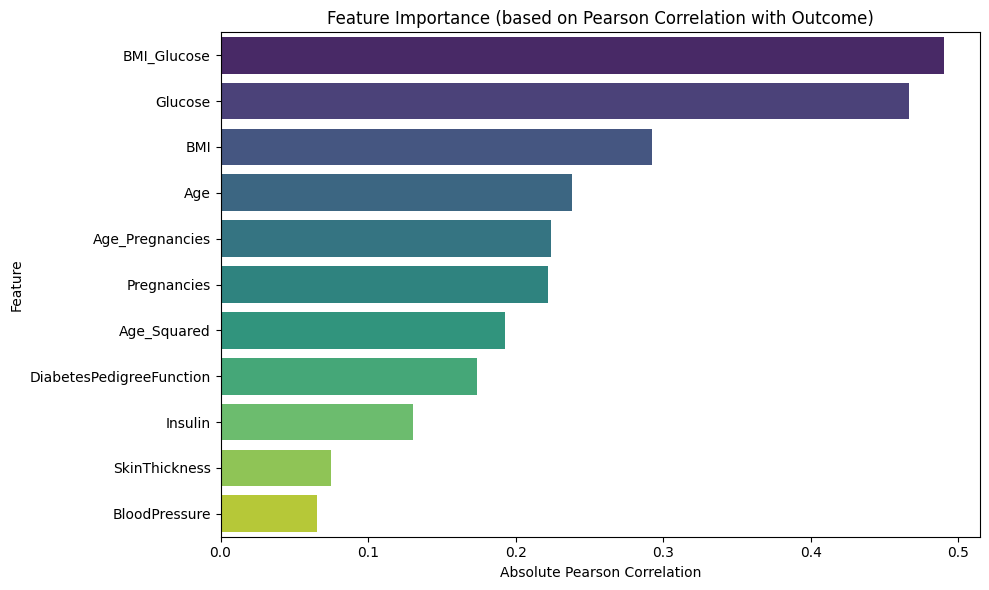

In [22]:
from scipy.stats import pearsonr
target = 'Outcome'
feature_cols = data.columns.drop(target)

correlations = []
p_values = []

for feature in feature_cols:
    r, p = pearsonr(data[feature], data[target])
    correlations.append(r)
    p_values.append(p)

# Create a DataFrame for inspection
corr_df = pd.DataFrame({
    'Feature': feature_cols,
    'Pearson_Correlation': correlations,
    'P_Value': p_values,
    'Absolute_Correlation': np.abs(correlations)
}).sort_values(by='Absolute_Correlation', ascending=False)

# Print or plot
print(corr_df)

# Plot as bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df, x='Absolute_Correlation', y='Feature', palette='viridis')
plt.title('Feature Importance (based on Pearson Correlation with Outcome)')
plt.xlabel('Absolute Pearson Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
pc_scores = [abs(pearsonr(X[col], y)[0]) for col in X.columns]

scaler = MinMaxScaler()
mi_scaled = scaler.fit_transform(np.array(mi_scores).reshape(-1, 1)).flatten()
pc_scaled = scaler.fit_transform(np.array(pc_scores).reshape(-1, 1)).flatten()

combined_score = (mi_scaled + pc_scaled) / 2  # Equal weight

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores,
    'PC_Score': pc_scores,
    'MI_Scaled': mi_scaled,
    'PC_Scaled': pc_scaled,
    'Combined_Score': combined_score
}).sort_values(by='Combined_Score', ascending=False)

threshold = 0.3
selected_features = importance_df[importance_df['Combined_Score'] >= threshold]['Feature'].tolist()
X_selected = X[selected_features]

print("Selected Features:", selected_features)
display(importance_df)

Selected Features: ['BMI_Glucose', 'Glucose', 'BMI', 'Age', 'Age_Pregnancies', 'Age_Squared', 'Insulin']


,Feature,MI_Score,PC_Score,MI_Scaled,PC_Scaled,Combined_Score
9,BMI_Glucose,0.130693,0.490262,1.000000,1.000000,1.000000
1,Glucose,0.108559,0.466581,0.815507,0.944306,0.879906
5,BMI,0.092592,0.292695,0.682418,0.535347,0.608882
7,Age,0.058849,0.238356,0.401159,0.407550,0.404354
10,Age_Pregnancies,0.046020,0.223992,0.294226,0.373767,0.333997
8,Age_Squared,0.050070,0.193079,0.327979,0.301063,0.314521
4,Insulin,0.065031,0.130548,0.452684,0.153999,0.303342
0,Pregnancies,0.032941,0.221898,0.185203,0.368843,0.277023
6,DiabetesPedigreeFunction,0.010722,0.173844,0.000000,0.255826,0.127913
2,BloodPressure,0.029139,0.065068,0.153515,0.000000,0.076758


Best Hyperparameters: {'logistic__C': 1}
Accuracy: 0.7662
AUC-ROC: 0.8167
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



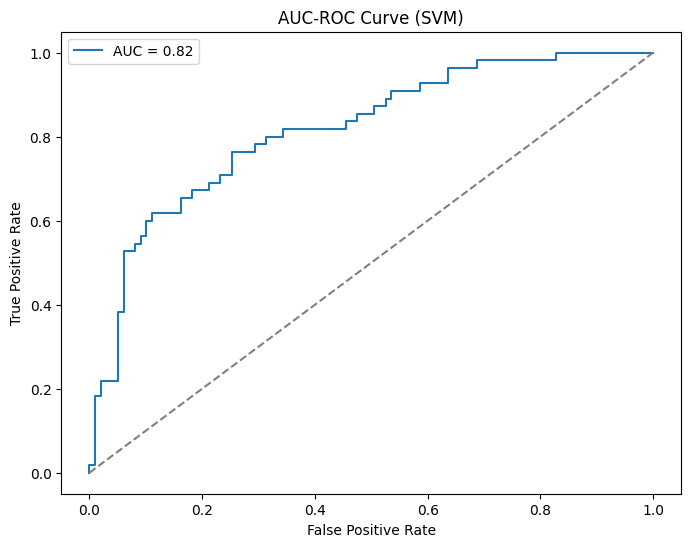

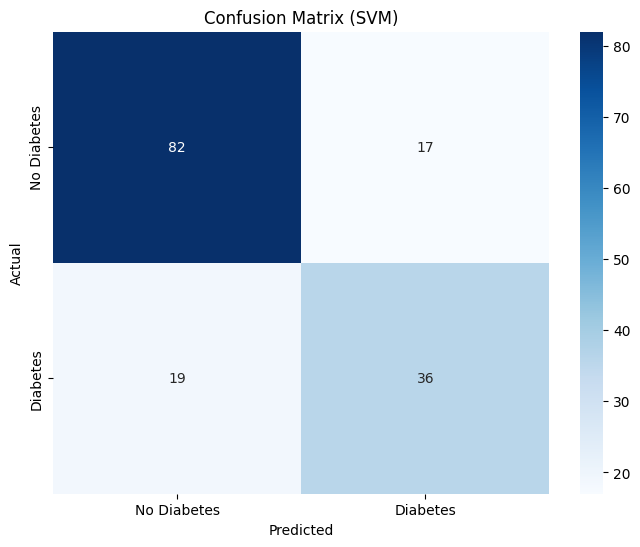

In [30]:
import io
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42, solver='liblinear', penalty='l1'))
])

param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_logistic = grid_search.best_estimator_

y_pred = best_logistic.predict(X_test)
y_probs = best_logistic.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_probs)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("Classification Report:\n", report)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (SVM)')
plt.legend()
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

Support Vector Machine (SVM) Model:

Best Hyperparameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Accuracy: 0.7727
AUC-ROC: 0.8282
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



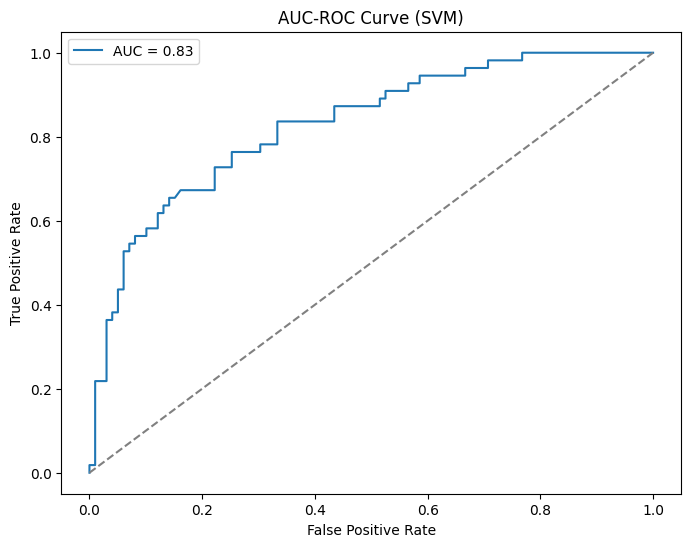

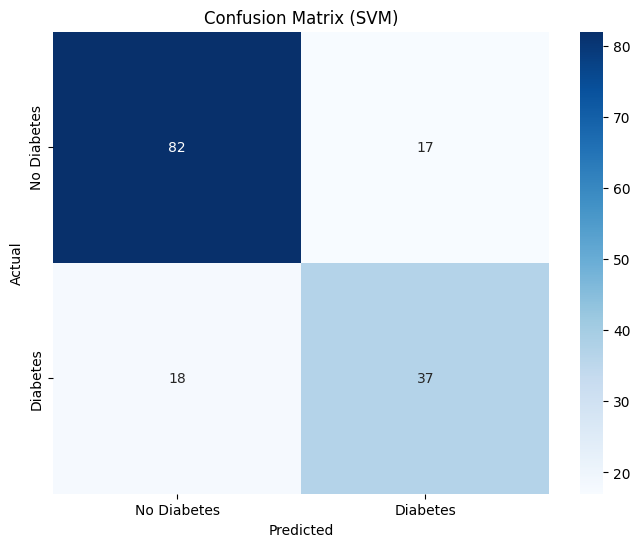

In [31]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.1, 1],
    'svm__kernel': ['linear', 'rbf']
}

n_splits = min(5, X_train.shape[0])
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test)
y_probs = best_svm.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_probs)

print("Support Vector Machine (SVM) Model:\n")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("Classification Report:\n", report)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (SVM)')
plt.legend()
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()